In [1]:
import backtrader.plot
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(16,12), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=[24, 16]
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.facecolor']='w'
plt.rcParams['figure.edgecolor']='k'
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['font.size'] = 20

<Figure size 1600x1200 with 0 Axes>

# Ví dụ 1

In [19]:
# Example
from rework_backtrader.simulation import SimulationEngine
from rework_backtrader.simulation.alpha_backbone.abstract_strategy_backbone import AbstractStrategy
from backtrader.indicators import CommodityChannelIndex
# from IPython.core.debugger import set_trace

class Example1(AbstractStrategy):
    params = dict(
                window=6
                )

    def next(self):
        # Vi la example nen a chi cho chay 1 lan
        if len(self) > 1:
            return
        # Tao dataframe dua tren gia close
        self.create_dataframe('close', 6)
        # Lay dataframe da duoc tao ra
        df = self.get_dataframe('close', 6)
        print(df)
        print('Current : ', self.datetime.datetime(0))
        for data in self.datas:
            print('\tData type : ', data)
            print('\tData name : ', data._name)
            print('\topen : ', data.open[0])
            print('\tclose : ', data.close[0])
            print('\thigh : ', data.high[0])
            print('\tlow : ', data.low[0])
            print('\tvolume : ', data.volume[0])
            
        self.order_target_size('VN30F1M', target=70)
            
            

    def stop(self):
        pnl = round((self.broker.get_value() - 1e9))
        print('Final PnL: {:,}'.format(pnl))
        print({key : getattr(self.p, key) for key in self.p._getkeys()})

                     VN30F1M
Date                        
2021-07-15 02:00:00   1406.8
Current :  2021-07-15 02:00:00
	Data type :  <backtrader.feeds.pandafeed.PandasData object at 0x7f89a4a23a00>
	Data name :  VN30F1M
	open :  1410.5
	close :  1406.8
	high :  1411.5
	low :  1403.1
	volume :  11687.0
Final PnL: 162,967,000
{'window': 6}
Mean Ratio PNL :  {'VN30F1M': (70, 0.008455908477225878)}
sharperatio                   1.168
max_drawn_down                0.578
mean_pnl                2328100.000
mean_ratio_pnl (%)            0.846
turn_over (%)                11.642
winrate (%)                   0.000
winrate_KC (%)                0.000
return                162967000.000
return_percent                0.163
Name: 0, dtype: object
Iplot =  False


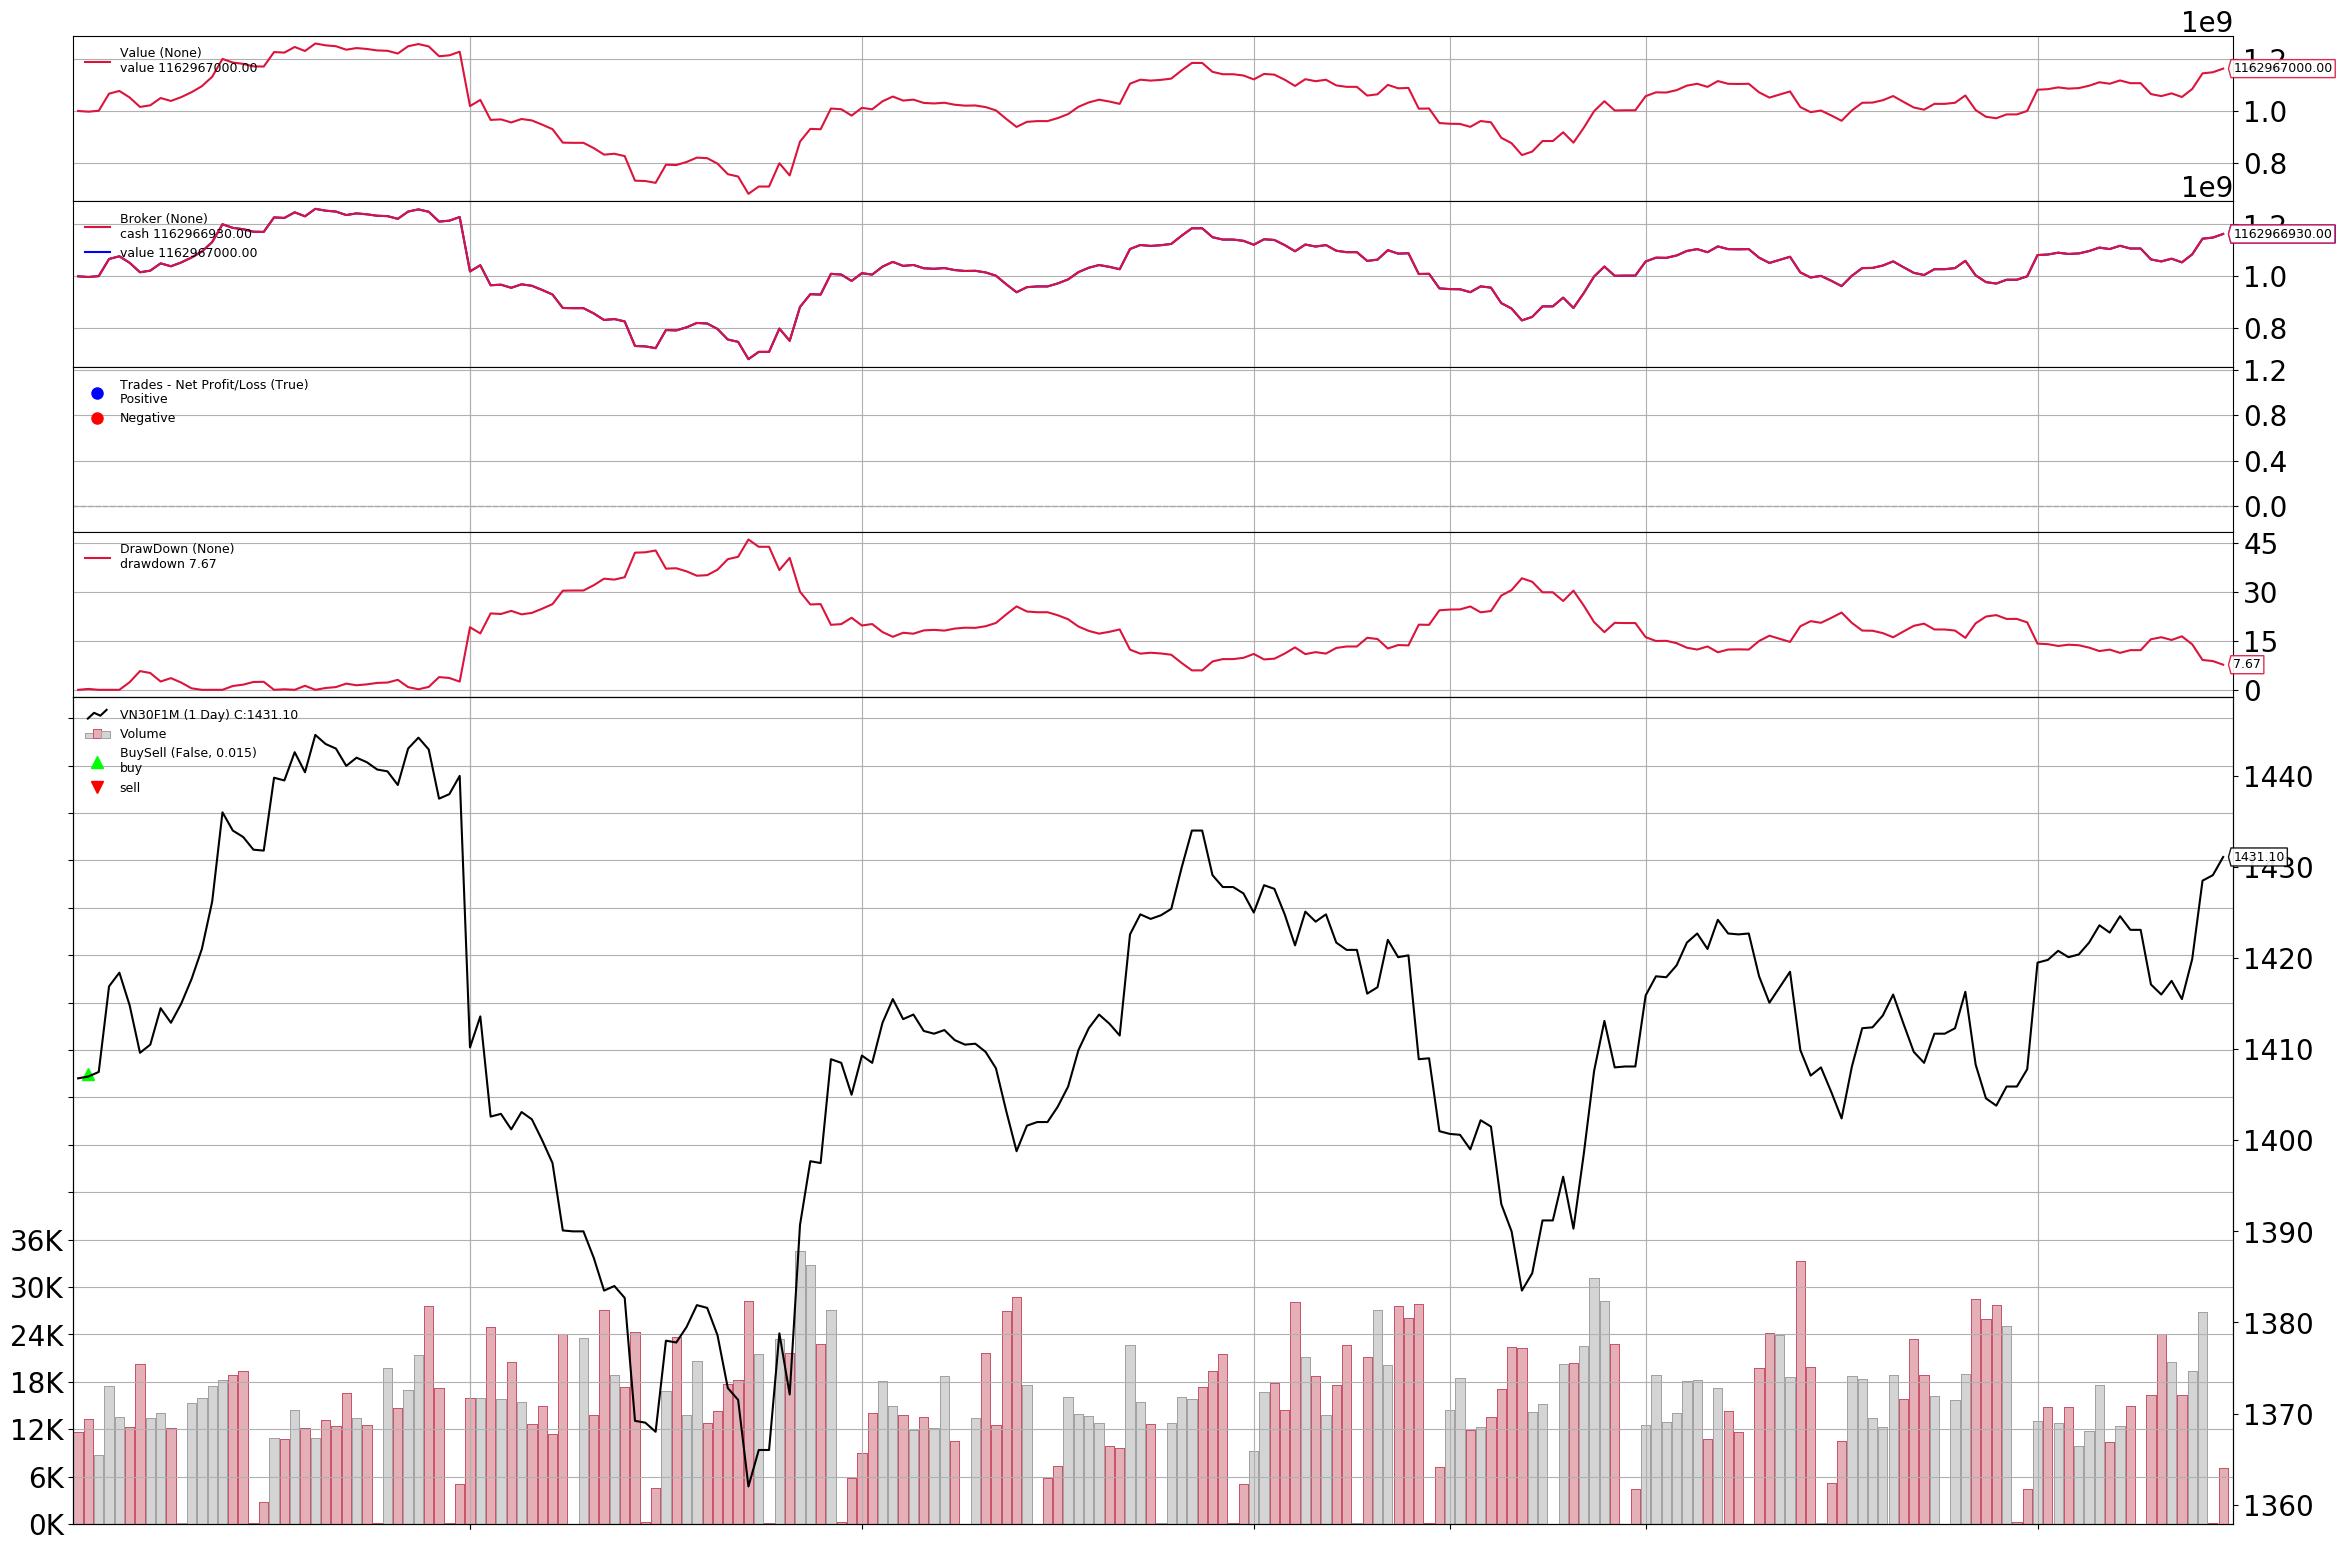

In [20]:
simulation = SimulationEngine(max_combination=10) 
# Add alpha
simulation.addstrategy(Example1)
# Add data
simulation.adddata(data_folders=['/home/lam/lam_playground/data/OS/15m'], 
                   names=['VN30F1M'])
# Set cash
simulation.set_cash(cash=1e9)
# Run without output
res = simulation.run(output=None, iplot = False)

# AbstractStrategy

### Attribute
- self.data : là một LineObject chứa data đầu tiên được add vào bằng simulation_engine

- **create_dataframe**(param, window):
    - Usage : Tạo dataframe từ giá trị param của tất cả các mã cổ phiếu đã được add vào
    - Input:
        - param : 